In [1]:
# Lab settings - please ingnore
# Make plots a resonable size
options(repr.plot.width=7, repr.plot.height=3.5)

<div class="big_title">LAB 5: Advanced data manipulation</div>

BIO3782: Biologist's Toolkit (Dalhousie University)

----------------------------------------

# Setup of workspace

<span class="important"></span> Make sure all required files are in the working directory:

* Create a **folder** on the "Desktop" and name it <span class='file'>Lab5</span>
* From Brightspace, download the following files into your new folder <span class='file'>Desktop\Lab5</span>:
   * <span class="file">Silver Tree Study photosynthetis.csv</span>
   * <span class="file">Silver tree study conductance.csv</span>
   * <span class="file">task_data_fox_size.csv</span>
   * <span class="file">task_data_fox_weight.csv</span>
   
* In RStudio, change the "working directory" to: <span class='file'>Desktop\Lab5</span>. Click here if you need a [refresher on the **working directory**](https://diego-ibarra.github.io/biol3782/week1/index.html#RStudio's-%22Working-Directory%22)

* In RStudio, create a new R script, name it <span class='file'>lab5.r</span> and make sure you save it in <span class='file'>Desktop\Lab5</span>. You will be writting and copy-pasting code to your <span class='file'>lab5.r</span> file so that you can keep a record of all you did in this lab.

As in previous labs, we'll try simulate "real-life" coding, where:

1. sometimes you want to type of copy-paste directly in <span class='file'>lab5.r</span> file, using RSTudio's <span class="editor"></span>, to build a script file that can be run as a whole to accomplish a series of tasks. Here you can execute sections as you type them in, by highlighting and clicking <span class="run"></span>. We'll guide you when to use the <span class="editor"></span> with the following: <br>

<div class="use_editor"></div>    
<br> 

2. some other times you want to quickly type or copy-paste code into RStudio's <span class="console"></span> and click [enter] as a way to do "one-off" queries or inspections that you do not want to be part of your script file. We'll guide you when to use the <span class="console"></span> with the following: <br>

<div class="use_console"></div>    
<br> 


----------------------------------


# Data manipulation

The path between data collection and the final plot or analysis is a publication is, to say the least, complicated and convoluted. Raw data files contain data organized in a way that preserves all the information that was available during collection, often in a format that facilitates data entry. For each different research objective — whether it is to test a hypothesis, do a plot or run an analysis — the raw data often needs to be filtered, splitted, joined or merged with other data, reshaped, mutated, summarized, and/or many other processes and trasformations. All of these intermediate steps, which are necessary to get the raw data into a shape or format suitable for the final analysis, are collective know as **Data manipulation**.


# The tidyverse

The `tidyverse` package is an "umbrella-package" (or "bundle-package") that installs `tidyr`, `dplyr`, and several other packages useful for data analysis, such as `ggplot2`, `tibble`, etc. 

The tidyverse package tries to address 3 common issues that arise when doing data analysis with some of the built-in functions that come with R:

1. The results from a base R function sometimes depend on the type of data.

2. Using R expressions in a non standard way, which can be confusing for new learners.

3. Hidden arguments, having default operations that new learners are not aware of.

Here we will only install and load the `tidyverse` package. In the following sections we will lear how to use many functions of several packages included in the `tidyverse`
    
You probably already have installed the `tidyverse` package, if so skip this step.

To install the `tidyverse` package...

<br>
<div class="use_console"></div>

In [ ]:
install.packages("tidyverse")

To **load** the `tidyverse` package...

<br>
<div class="use_editor"></div>

In [13]:
library(tidyverse)

You should also download the [dplyr cheat sheet](https://github.com/rstudio/cheatsheets/raw/master/data-transformation.pdf) for reference as well.

# What are `dplyr` and `tidyr`?

Both, `dplyr` and `tidyr`, are packages included in the `tidyverse` package. They should be both loaded (when you did `library(tidyverse)`) and ready to go...

`dplyr` is a package for making tabular data manipulation easier. It pairs nicely with tidyr which enables you to swiftly convert between different data formats for plotting and analysis.

The package `dplyr` provides easy tools for the most common data manipulation tasks. It is built to work directly with data frames, with many common tasks optimized to run very fast (they were written in a compiled language, like C++). 

The package `tidyr` addresses the common problem of wanting to reshape your data for plotting and use by different R functions. Sometimes we want data sets where we have one row per measurement. Sometimes we want a data frame where each measurement type has its own column, and rows are instead more aggregated groups (e.g., a time period, an experimental unit like a plot or a batch number). Moving back and forth between these formats is non-trivial, and `tidyr` gives you tools for this and more sophisticated data manipulation.

# The data 

Here we will work with data collected to evaluate the cumulative effects of drought and disease on the silver tree (*Leucadendron Argenteum*). The data includes measured physiological responses of the plant such as photosynthetic oxygen evolution and electrical conductivity.

<table>
<tr>
<td><img src="leucadendron_argenteum.jpg" width="500px"></td>
<td><img src="silver_tree.jpg" width="200px"></td>
</tr>
</table>



First, let's download the data. 

You should already have the data files <span class="file">Silver Tree Study photosynthetis.csv</span> and <span class="file">Silver tree study conductance.csv</span> inside  <span class="file">Desktop/Lab5</span>, and set up that folder as your working directory. If you haven't take a look at the [beginning of this lab](#Setup-of-workspace).

First, we'll read in our data using the `read_csv()` function from the tidyverse package `readr`.

<br>
<div class="use_editor"></div>

In [14]:
photosynthesis <- read_csv("Silver Tree Study photosynthetis.csv")

conductivity <- read_csv("Silver tree study conductance.csv")


-- Column specification --------------------------------------------------------
cols(
  `Sample type` = col_character(),
  `Days after inoculation` = col_double(),
  Date = col_character(),
  Licor = col_double(),
  Trial = col_double(),
  Treatment = col_character(),
  Species = col_character(),
  `Plant Number` = col_double(),
  `Isolate Number` = col_double(),
  `Unique Sample Number` = col_double(),
  Obs = col_double(),
  Photosynthesis = col_double()
)


-- Column specification --------------------------------------------------------
cols(
  `Sample type` = col_character(),
  `Days after inoculation` = col_double(),
  Date = col_character(),
  Licor = col_double(),
  Trial = col_double(),
  Treatment = col_character(),
  Species = col_character(),
  `Plant Number` = col_double(),
  `Isolate Number` = col_double(),
  `Unique Sample Number` = col_double(),
  Obs = col_double(),
  Conductance = col_double(),
  Ci = col_double()
)



Let's take a look at the `photosynthesis` datasets using the `head()`, `tail()` and `str()`. 

<br>
<div class="use_console"></div>

In [15]:
head(photosynthesis)

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,1,1.1459282
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,2,0.8224351
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,3,0.8382796
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,4,1.2894069
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,5,1.3339338
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,6,1.1601482


<div class="Q"><br><br>

How many rows did the function <b>head()</b> display? 

ANSWER: 6<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What <b>date</b> was the first row collected on? 

ANSWER: 6/8/2018<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the function to display the last few rows of a dataframe (opposite of <b>head()</b>)? 

ANSWER: tail()<br><br>

<br><br><div class="qhelp"></div></div>

Now lets take a look at the structure of data frame.


<br>
<div class="use_console"></div>

In [16]:
str(photosynthesis)

tibble [1,722 x 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Sample type           : chr [1:1722] "1DroughtIndigenous Pathogen 1" "1DroughtIndigenous Pathogen 1" "1DroughtIndigenous Pathogen 1" "1DroughtIndigenous Pathogen 1" ...
 $ Days after inoculation: num [1:1722] 9 9 9 9 9 9 9 9 9 9 ...
 $ Date                  : chr [1:1722] "6/8/2018" "6/8/2018" "6/8/2018" "6/8/2018" ...
 $ Licor                 : num [1:1722] 6400 6400 6400 6400 6400 6400 6400 6400 6400 6400 ...
 $ Trial                 : num [1:1722] 1 1 1 1 1 1 1 1 1 1 ...
 $ Treatment             : chr [1:1722] "Drought" "Drought" "Drought" "Drought" ...
 $ Species               : chr [1:1722] "Indigenous Pathogen" "Indigenous Pathogen" "Indigenous Pathogen" "Indigenous Pathogen" ...
 $ Plant Number          : num [1:1722] 1 1 1 1 1 1 1 1 1 1 ...
 $ Isolate Number        : num [1:1722] 1 1 1 1 1 1 1 1 1 1 ...
 $ Unique Sample Number  : num [1:1722] 3 3 3 3 3 3 3 3 3 3 ...
 $ Obs                   : num [1:1722] 1 2 3 4 5 

<div class="Q"><br><br>

How many columns/variables are there in <b>photosynthesis</b>? 

ANSWER: 12<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What class of variable is <b>Species</b>?

ANSWER: Character (or chr)
    
    other multiple choice options:
    Double/numeric (or num)
    Factor (or fac)
    Logical

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

The function <b>str()</b> shows the structure of the dataframe? 

ANSWER: TRUE<br><br>

<br><br><div class="qhelp"></div></div>

Let's make a plot to quickly asseess Photosynthesis as a function of pathogen species.

<br>
<div class="use_editor"></div>

Warning message:
"Removed 10 rows containing non-finite values (stat_boxplot)."

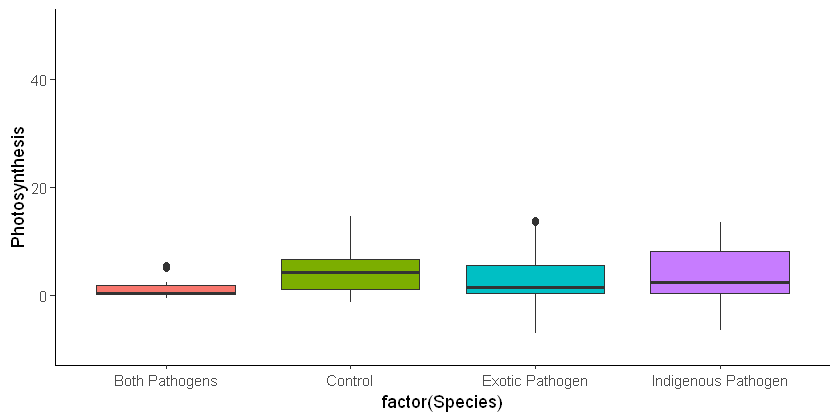

In [17]:
ggplot(data=photosynthesis,
       aes(x=factor(Species), y=Photosynthesis, fill=factor(Species)))+
geom_boxplot()+
scale_y_continuous(limits=c(-10,50))+ #sets axis limits for y-axis. We note that this will remove values > 50. A warning message will let us know how many observations were excluded (10 observations)
theme_classic()+
guides(fill=FALSE) #removes legend for fill

As you can see, the first bar (i.e Both Pathogens) shows smaller Photosysthesis that the Control and trees with only the exotic pathogen or the indigenous pathogen. 

Now lets do the same with `conductivity`.

<br><br><br>
<div class="startTASK"></div>

Take a look at the `conductivity` datasets using the `head()`, `tail()` and `str()`. Then answer the following questions.

<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

How many observations are in <b>conductivity</b>? 

ANSWER: 1722<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many columns/variables are there in <b>conductivity</b>? 

ANSWER: 13<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What class of variable is <b>Conductance</b>?

ANSWER: Double/numeric (or num)
    
    other multiple choice options:
    Character (or chr)
    Factor (or fac)
    Logical
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the last value in the <b>Conductance</b> column? 

ANSWER: 0.05257730<br><br>

<br><br><div class="qhelp"></div></div>

Let's make a plot to asseess Conductance as a function of pathogen species. 

<br>
<div class="use_editor"></div>

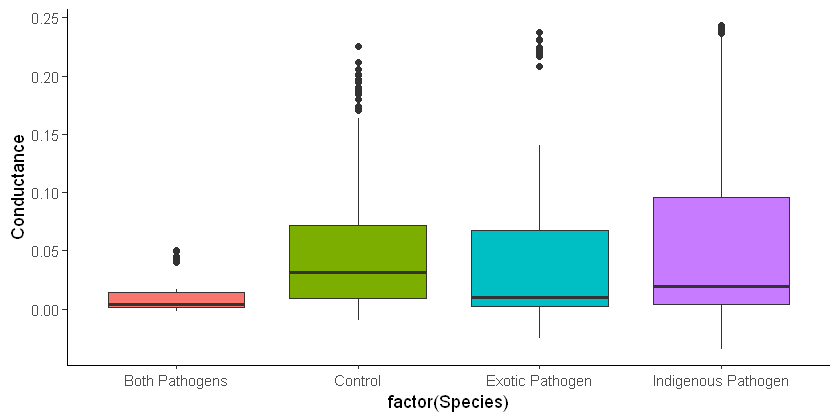

In [18]:
ggplot(data=conductivity,
       aes(x=factor(Species), y=Conductance, fill=factor(Species)))+
geom_boxplot()+
theme_classic()+
guides(fill=FALSE) #removes legend for fill

When looking at `conductance` the pattern is even stronger than with `photosynthesis`. Here too, the first bar (i.e Both Pathogens) shows smaller conductance that the Control and trees with only the exotic pathogen or the indigenous pathogen. 


<span class="TODO"> Ad maybe summary(), min(), max() ncol(), etc... and more questions</span>

Since the experiment was run with two different instruments, we ended up with two different datasets of paired measurements. We can combined both datasets into one more useful dataset.

# Combining two or more datasets

There are several functions that allow you to combined multiple datasets. Here we will discuss several `join` functions and also the `merge()` function.

## Join

`Join` functions allow you to connect multiple tables based on common variables (columns). There are many types of `join` functions included in `dplyr`. Here we'll review a few, but you can [see the full list here](https://dplyr.tidyverse.org/reference/join.html#join-types).

Most `join` functions follow the basic syntax below:

<span class="nomenclature">joinFunctionName(dataFrame1, dateFrame2, by = "variable names")</span>
    
However, most of the time you will use the "joined" product multiple times; therefore, you probably want to "save" the joined table in a new variable:

<span class="nomenclature">newJoinedDataFrame <- joinFunctionName(dataFrame1, dateFrame2, by = "variable names")</span>

    

### left_join

The most useful of the `join` functions is a `left join()`, which takes a table (say table 1), and then adds all matching records from table 2.The resulting table will show all records from table 1 (the left hand table), and matching records from table 2 (the right hand table).

The specific syntax of `left_join()` is:

`dataFrame3 <- left_join(dataFrame1, dateFrame2, by = "variable names")`
    
Graphically, it would look like this:
    
<img src="left_join0.png" width="500px">
    
However, to make the graphics a bit simpler, we won't save the resulting "joined" data frame into the `df3` variable. Instead, we will only show you the command ran over the resulting joined table. The new simpler graphic looks like this: 
    
<img src="left_join.png" width="500px">
    
From now on, we will be using the simpler graphics in all the examples below.
    
-----------------------------

About the `left_join()`, note that R will automatically detect which columns two tables have in common **IF** they are called the same thing. If not, you have to feed the matching columns names into the `left_join()` function. 

We can create a new dataframe with information all the information from both `photosynthesis` and `conductivity` joining the two dataframes using the qualifying variables in the columns from "Sample type" to "Obs".
    
<br>
<div class="use_editor"></div>

In [19]:
# left_join example
combined_data <- left_join(photosynthesis,conductivity, 
                           by =c("Sample type",
                                 "Days after inoculation", 
                                 "Date", 
                                 "Licor", 
                                 "Trial",
                                 "Treatment",
                                 "Species",
                                 "Plant Number",
                                 "Isolate Number", 
                                 "Unique Sample Number",
                                 "Obs"))

Let's look at the combined dataset below using the `head()` and `str()` functions:

<br>
<div class="use_console"></div>

In [20]:
head(combined_data)

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis,Conductance,Ci
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,1,1.1459282,0.000407974,-4050.4585
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,2,0.8224351,0.000454750,-2467.0358
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,3,0.8382796,0.000673320,-1575.0865
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,4,1.2894069,0.000470876,-3938.6611
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,5,1.3339338,0.000676270,-2726.5778
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,6,1.1601482,0.002413163,-365.7831


We can see that `left_join` combined `photosynthesis` and `conductivity` data by all the criteria columns we specified above. We basically get `photosynthesis` back, but with the addition of variables `Conductance` and `Ci`, which are unique to `conductivity`. 

<br>
<div class="use_console"></div>

In [21]:
str(combined_data)

tibble [1,722 x 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Sample type           : chr [1:1722] "1DroughtIndigenous Pathogen 1" "1DroughtIndigenous Pathogen 1" "1DroughtIndigenous Pathogen 1" "1DroughtIndigenous Pathogen 1" ...
 $ Days after inoculation: num [1:1722] 9 9 9 9 9 9 9 9 9 9 ...
 $ Date                  : chr [1:1722] "6/8/2018" "6/8/2018" "6/8/2018" "6/8/2018" ...
 $ Licor                 : num [1:1722] 6400 6400 6400 6400 6400 6400 6400 6400 6400 6400 ...
 $ Trial                 : num [1:1722] 1 1 1 1 1 1 1 1 1 1 ...
 $ Treatment             : chr [1:1722] "Drought" "Drought" "Drought" "Drought" ...
 $ Species               : chr [1:1722] "Indigenous Pathogen" "Indigenous Pathogen" "Indigenous Pathogen" "Indigenous Pathogen" ...
 $ Plant Number          : num [1:1722] 1 1 1 1 1 1 1 1 1 1 ...
 $ Isolate Number        : num [1:1722] 1 1 1 1 1 1 1 1 1 1 ...
 $ Unique Sample Number  : num [1:1722] 3 3 3 3 3 3 3 3 3 3 ...
 $ Obs                   : num [1:1722] 1 2 3 4 5 

<div class="Q"><br><br>

How many observations(rows) does `combined_data` have? 

ANSWER: 1722<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many columns does `combined_data` have? 

ANSWER: 14<br><br>

<br><br><div class="qhelp"></div></div>

### inner_join

The `inner_join()` function returns all rows from dataframe 1 where there are matching values in dataframe 2, and all columns from dataframe 1  and dataframe 2. If there are multiple matches between them, all combination of the matches are returned. Basically, the result shows only 'matched' records - where there is a matching value in both tables. **Instances where there are no matching values are thrown out.**

<img src="inner_join.png" width="700px">

<br><br>
<div class="use_editor"></div>

In [22]:
# inner_join example
combined_inner <- inner_join(photosynthesis, conductivity, 
                             by =c("Sample type",
                                   "Days after inoculation",
                                   "Date", 
                                   "Trial",
                                   "Treatment",
                                   "Species",
                                   "Plant Number",
                                   "Isolate Number", 
                                   "Unique Sample Number",
                                   "Obs"))

Then, 

<br>
<div class="use_console"></div>

In [23]:
head(combined_inner)

Sample type,Days after inoculation,Date,Licor.x,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis,Licor.y,Conductance,Ci
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,1,1.1459282,6400,0.000407974,-4050.4585
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,2,0.8224351,6400,0.000454750,-2467.0358
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,3,0.8382796,6400,0.000673320,-1575.0865
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,4,1.2894069,6400,0.000470876,-3938.6611
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,5,1.3339338,6400,0.000676270,-2726.5778
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,6,1.1601482,6400,0.002413163,-365.7831


Notice that we get repeated variables `Licor.x` and `Licor.y`. We didn't specify that `Licor` was a criteria for joining and since it appears in both datasets, join will create new variables for them; once from each dataset. 

<div class="Q"><br><br>
What variables would be duplicated if we ran the following code?
<br><br>
<span class="codeX">inner_join(photosynthesis, conductivity,</span><br> 
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;by =c("Sample type",</span><br> 
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"Days after inoculation",</span><br> 
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp"Date",</span><br>  
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp"Trial",</span><br> 
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp"Treatment",</span><br> 
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp"Species",</span><br> 
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp"Plant Number",</span><br> 
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp"Isolate Number",</span><br>  
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp"Unique Sample Number"</span><br> 
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp))</span><br> 

ANSWER: Licor and Obs<br><br>

<br><br><div class="qhelp"></div></div>

### full_join

`full_join` will return all rows and all columns from both dataframe 1 and dataframe 2. **`full_join` will return NA for instances where there are no matching values.**

<img src="full_join.png" width="500px">

<br><br>
<div class="use_editor"></div>

In [24]:
# full_join example
combined_full <- full_join(photosynthesis, conductivity)

Joining, by = c("Sample type", "Days after inoculation", "Date", "Licor", "Trial", "Treatment", "Species", "Plant Number", "Isolate Number", "Unique Sample Number", "Obs")


<br><br><br>
<div class="startTASK"></div>

Take a look at `combined_full` using the `head()`, `tail()` and `str()`. Then answer the following questions.

<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

How many observations/rows does the variable Ci have in the <b>combined_full</b> dataset? 

ANSWER: 1722<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Are the variables (or columns) of <b>combined_full</b> and <b>combined_data</b> the same? 

ANSWER: YES<br><br>

<br><br><div class="qhelp"></div></div>

Notice that this returns pretty much the same dataset as the one we created with `left_join`. We didn't have to specify any of the variables to join by in this case. We get all varaibles and rows from both `photosynthesis` and `conductivity`.

### anti_join

`anti_join` removes all records from dataframe 1 where that have matching variables in dataframe 2. This basically filters your datasets. Note that `anti_join()` is essentially the opposite of `inner_join()`.

<img src="anti_join.png" width="700px">

<br><br>
<div class="use_editor"></div>

In [25]:
# anti_join example
combined_anti <- anti_join(photosynthesis, conductivity)

Joining, by = c("Sample type", "Days after inoculation", "Date", "Licor", "Trial", "Treatment", "Species", "Plant Number", "Isolate Number", "Unique Sample Number", "Obs")


<br><br><br>
<div class="startTASK"></div>

Take a look at `combined_anti` using the `head()`, `tail()` and `str()`. Then answer the following questions.

<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

How many variables does <b>combined_anti</b> have? 

ANSWER: 12<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many rows does <b>combined_anti</b> have? 

ANSWER: 0<br><br>

<br><br><div class="qhelp"></div></div>

Notice that we effectively returned all variables of `photosynthesis` without any data! This happened because `conductivity` had the all same variables and these measurements were paired with those of photosynthesis (taken from the same sample at the same time). There were no instances where the variables didn't match that the `anti_join` function could return and observation. 

## Merge

Another way to combine datasets is to use the function `merge()`. By default the data frames are merged on the columns with names they both have, but separate specifications of the columns can be given by the `by`, `by.x` and `by.y` arguments. The rows in the two data frames that match on the specified columns are extracted, and joined together. If there is more than one match, all possible matches contribute one row each. This basically merges two datasets horizontally.

<img src="merge.png" width="500px">

<br><br><br>
<div class="startTASK"></div>

Use the function's help file to look at the syntax for `merge()`.

<div class="endTASK"></div>
<br><br><br>

Let's recreate the `combined_data` dataset using merge instead.

<br>
<div class="use_editor"></div>

In [26]:
# merge example
combined_data <- merge(photosynthesis,conductivity,all.x = TRUE, all.y = TRUE)

 Now, lets take a look at `combined_data`
 
<br>
<div class="use_console"></div>

In [27]:
head(combined_data) 

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis,Conductance,Ci
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,9,NA,148,1,0.05671618,0.001441047,332.3998
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,9,NA,148,10,0.07601768,0.001588715,318.1265
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,9,NA,148,2,0.06055765,0.001520727,331.2409
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,9,NA,148,3,0.04863937,0.001897092,354.0128
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,9,NA,148,4,0.07465322,0.000933100,267.8774
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,9,NA,148,5,0.07911806,0.001011424,270.5740


<br>
<div class="use_console"></div>

In [28]:
str(combined_data)

'data.frame':	1722 obs. of  14 variables:
 $ Sample type           : chr  "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" ...
 $ Days after inoculation: num  9 9 9 9 9 9 9 9 9 9 ...
 $ Date                  : chr  "6/8/2018" "6/8/2018" "6/8/2018" "6/8/2018" ...
 $ Licor                 : num  6800 6800 6800 6800 6800 6800 6800 6800 6800 6800 ...
 $ Trial                 : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Treatment             : chr  "Drought" "Drought" "Drought" "Drought" ...
 $ Species               : chr  "Both Pathogens" "Both Pathogens" "Both Pathogens" "Both Pathogens" ...
 $ Plant Number          : num  9 9 9 9 9 9 9 9 9 9 ...
 $ Isolate Number        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Unique Sample Number  : num  148 148 148 148 148 148 148 148 148 148 ...
 $ Obs                   : num  1 10 2 3 4 5 6 7 8 9 ...
 $ Photosynthesis        : num  0.0567 0.076 0.0606 0.0486 0.0747 ...
 $ Conductance           : num  0.0

<div class="Q"><br><br>

What does the arguement "by" in the merge function do? 

ANSWER: specifies the columns used as classifiers for merging<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many variables does <b>combined_data</b> have? 

ANSWER: 14<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What extra variable does <b>combined_data</b> have that <b>conductivity</b> does not? 

ANSWER: Photosynthesis<br><br>
    
    other options for multiple choice:
    Species
    Trial
    Obs

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Are the variable classes of <b>combined_data</b> created using <b>left_join</b> and <b>merge</b> the same? 

ANSWER: YES<br><br>

<br><br><div class="qhelp"></div></div>

<br><br><br>
<div class="startTASK"></div>

Let us download the task datasets <span class="file">task_data_fox_size.csv</span> and <span class="file">task_data_fox_weight.csv</span> 

Using `Joins` or `merge`, create a new dataset called `fox_data` combining data from both <span class="file">task_data_fox_size.csv</span> and <span class="file">task_data_fox_weight.csv</span> 

<div class="endTASK"></div>

<br><br><br>

<div class="Q"><br><br>

How many rows does fox_data have? 

ANSWER: 30
    
    other options: 11911
    6
    31
    <br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many columns does fox_data have? 

ANSWER: 6<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Using the <b>summary()</b> function, what is the median value of avfood? 

ANSWER: 0.6994<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What class of variable is ID? 

ANSWER: numeric<br><br>

<br><br><div class="qhelp"></div></div>

Next, we're going to learn some of the most common `dplyr` functions:

* `select()`: subset columns
* `filter()`: subset rows on conditions
* `mutate()`: create new columns by using information from other columns
* `group_by()` and `summarize()`: create summary statistics on grouped data
* `arrange()`: sort results
* `count()`: count discrete values

_________________________________________________________________________________________________________________________

# Selecting columns

If we only want to keep certain columns of data, we can use `select()`. The first argument of this function is the dataset, and the subsequent arguments are the columns to keep. You can read all the details on how to use `select()` in its help file. However, the basic syntax is:

<span class="nomenclature">newSelectedData <- select(data, column names)</span>
    
Graphically, `select()` looks like this:

<img src="select.png" width="450px">


---------------------


In the following code, we will select the columns `Sample type`, `Photosynthesis`, and `Conductance`. 

<br>
<div class="use_editor"></div>

In [29]:
# select example
sml_data <- select(combined_data, `Sample type`,Photosynthesis, Conductance)

Let's take look ar `sml_data`:

<br>
<div class="use_console"></div>

In [30]:
head(sml_data)

Sample type,Photosynthesis,Conductance
1DroughtBoth Pathogens9,0.05671618,0.001441047
1DroughtBoth Pathogens9,0.07601768,0.001588715
1DroughtBoth Pathogens9,0.06055765,0.001520727
1DroughtBoth Pathogens9,0.04863937,0.001897092
1DroughtBoth Pathogens9,0.07465322,0.000933100
1DroughtBoth Pathogens9,0.07911806,0.001011424


Then,

<br>
<div class="use_console"></div>

In [31]:
str(sml_data)

'data.frame':	1722 obs. of  3 variables:
 $ Sample type   : chr  "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" ...
 $ Photosynthesis: num  0.0567 0.076 0.0606 0.0486 0.0747 ...
 $ Conductance   : num  0.001441 0.001589 0.001521 0.001897 0.000933 ...


<div class="Q"><br><br>

How many variables (or columns) are in <b>sml_data</b>?
    
ANSWER to be removed in final iteration: 3 

<br><br><div class="qhelp"></div></div>

## Selecting multiple columns with :

We can also use `:` to select multiple columns from left to right.

<br>
<div class="use_editor"></div>

In [32]:
# select example using :
sml_data_select <- select(combined_data, `Sample type`:Species,Photosynthesis, Conductance)

Let's take a look at `sml_data_select`:

<br>
<div class="use_console"></div>

In [33]:
head(sml_data_select)
str(sml_data_select)

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Photosynthesis,Conductance
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,0.05671618,0.001441047
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,0.07601768,0.001588715
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,0.06055765,0.001520727
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,0.04863937,0.001897092
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,0.07465322,0.000933100
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,0.07911806,0.001011424


'data.frame':	1722 obs. of  9 variables:
 $ Sample type           : chr  "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" ...
 $ Days after inoculation: num  9 9 9 9 9 9 9 9 9 9 ...
 $ Date                  : chr  "6/8/2018" "6/8/2018" "6/8/2018" "6/8/2018" ...
 $ Licor                 : num  6800 6800 6800 6800 6800 6800 6800 6800 6800 6800 ...
 $ Trial                 : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Treatment             : chr  "Drought" "Drought" "Drought" "Drought" ...
 $ Species               : chr  "Both Pathogens" "Both Pathogens" "Both Pathogens" "Both Pathogens" ...
 $ Photosynthesis        : num  0.0567 0.076 0.0606 0.0486 0.0747 ...
 $ Conductance           : num  0.001441 0.001589 0.001521 0.001897 0.000933 ...


<div class="Q"><br><br>

How many variables (or columns) are in <b>sml_data_select</b>?
    
ANSWER to be removed in final iteration: 3 

<br><br><div class="qhelp"></div></div>

## Omiting columns during select

To select all columns except certain ones, put a "-" in front of the variable to exclude it. In the following code, we want to exclude the columns "Licor" and "Obs".

<br>
<div class="use_editor"></div>

In [34]:
# select example using -
sml_data_omit <- select(combined_data, -Licor, -Obs)

Let's take a look at `sml_data_omit`:

<br>
<div class="use_console"></div>

In [35]:
head(sml_data_omit)
str(sml_data_omit)

Sample type,Days after inoculation,Date,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Photosynthesis,Conductance,Ci
1DroughtBoth Pathogens9,9,6/8/2018,1,Drought,Both Pathogens,9,NA,148,0.05671618,0.001441047,332.3998
1DroughtBoth Pathogens9,9,6/8/2018,1,Drought,Both Pathogens,9,NA,148,0.07601768,0.001588715,318.1265
1DroughtBoth Pathogens9,9,6/8/2018,1,Drought,Both Pathogens,9,NA,148,0.06055765,0.001520727,331.2409
1DroughtBoth Pathogens9,9,6/8/2018,1,Drought,Both Pathogens,9,NA,148,0.04863937,0.001897092,354.0128
1DroughtBoth Pathogens9,9,6/8/2018,1,Drought,Both Pathogens,9,NA,148,0.07465322,0.000933100,267.8774
1DroughtBoth Pathogens9,9,6/8/2018,1,Drought,Both Pathogens,9,NA,148,0.07911806,0.001011424,270.5740


'data.frame':	1722 obs. of  12 variables:
 $ Sample type           : chr  "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" ...
 $ Days after inoculation: num  9 9 9 9 9 9 9 9 9 9 ...
 $ Date                  : chr  "6/8/2018" "6/8/2018" "6/8/2018" "6/8/2018" ...
 $ Trial                 : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Treatment             : chr  "Drought" "Drought" "Drought" "Drought" ...
 $ Species               : chr  "Both Pathogens" "Both Pathogens" "Both Pathogens" "Both Pathogens" ...
 $ Plant Number          : num  9 9 9 9 9 9 9 9 9 9 ...
 $ Isolate Number        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Unique Sample Number  : num  148 148 148 148 148 148 148 148 148 148 ...
 $ Photosynthesis        : num  0.0567 0.076 0.0606 0.0486 0.0747 ...
 $ Conductance           : num  0.001441 0.001589 0.001521 0.001897 0.000933 ...
 $ Ci                    : num  332 318 331 354 268 ...


<div class="Q"><br><br>

How many variables (or columns) are in <b>sml_data_omit</b>?
    
ANSWER to be removed in final iteration: 3 

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Using the "combined_data" dataset and the "-", what would the code look like to select all columns except Species?
    
ANSWER to be removed in final iteration: select(combined_data, -Species) <br><br>
    
    
    other mutiple choice options: 
    
    select(combined_data, `Sample type`:Treatment, `Plant Number`:Conductance)
    
    select(combined_data, Species)
    
    select(combined_data, -Species) 

<br><br><div class="qhelp"></div></div>

# Filtering rows

What if we only want to select the data from one Species? You can also choose rows based on a specific criterion using the `filter()` function. You can read all the details on how to use `filter()` in its help file. However, the basic syntax is:

<span class="nomenclature">filteredData <- filter(dataset, selection criteria)</span>
    
Graphically, `filter()` looks like this:

<img src="filter.png" width="500px">

In the following code, we want to select all data from Indigenous Pathogen Species only.
    
You could do this following the same approach as above...
    
Step 1: create a new filtered_variable:

<br>
<div class="use_editor"></div>

In [36]:
filtered_data <- filter(combined_data, Species == "Indigenous Pathogen")

Step 2: Use the new `filtered_data` variable:

<br>
<div class="use_console"></div>

In [37]:
head(filtered_data)

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis,Conductance,Ci
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,1,0.3648225,0.003559033,231.1741
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,10,0.7743988,0.005086506,151.8653
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,11,0.7948750,0.005197517,150.6128
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,2,0.4385167,0.003528366,196.6384
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,3,0.5007142,0.003146543,141.4915
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,4,0.5631102,0.004374931,189.2657


<br>

...or we can skip the intermediate variable and "nest" one function within another (see example below). This is preferable if you are only going to use the "filtered" data once. If you are going to use the filtered data multiple times, it is better to create a sepate variable, like `filtered_data`. We'll talk more about nesting functions is a section below. 

For now, let's filter `combined_data` and take a look, using nested functions:

<br>
<div class="use_console"></div>

In [38]:
head(filter(combined_data, Species == "Indigenous Pathogen")) 

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis,Conductance,Ci
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,1,0.3648225,0.003559033,231.1741
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,10,0.7743988,0.005086506,151.8653
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,11,0.7948750,0.005197517,150.6128
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,2,0.4385167,0.003528366,196.6384
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,3,0.5007142,0.003146543,141.4915
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,4,0.5631102,0.004374931,189.2657


<div class="Q"><br><br>

How many rows are in the original <b>combined_data</b> dataset?
    
ANSWER to be removed in final iteration: 1722 

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many rows are in <b>filter(combined_data, Species == "Indigenous Pathogen")</b>?
    
ANSWER to be removed in final iteration: 569 

<br><br><div class="qhelp"></div></div>

We can also filter by multiple criteria. Say we want *Obs 1* data from Indigenous Pathogen Species only. We can use the `filter()` function and expand out selection criteria.

<br>
<div class="use_console"></div>

In [39]:
head(filter(combined_data, Species == "Indigenous Pathogen", Obs ==1))

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis,Conductance,Ci
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,1,0.36482248,0.003559033,231.1741
1DroughtIndigenous Pathogen 1,22,6/21/2018,6400,1,Drought,Indigenous Pathogen,1,1,49,1,0.02565309,0.004572983,384.1540
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,1,1.14592822,0.000407974,-4050.4585
1DroughtIndigenous Pathogen 2,37,7/6/2018,6800,1,Drought,Indigenous Pathogen,2,1,80,1,0.03939854,0.002624114,370.6015
1DroughtIndigenous Pathogen 3,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,3,2,8,1,13.29281498,0.104861134,186.7866
1DroughtIndigenous Pathogen 4,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,4,2,111,1,-0.01090356,0.002788285,399.8869


<div class="Q"><br><br>

How many rows are in <b>filter(combined_data, Species == "Indigenous Pathogen", Obs ==1)</b>?
    
ANSWER to be removed in final iteration: 54 

<br><br><div class="qhelp"></div></div>

---------------------

Let's take a look at our Species data to see if we can clean up our dataset. We note that Species is a ***character*** column, where using the `levels()` function would return `NULL` (i.e. empty, or nothing).

<br>
<div class="use_console"></div>

In [40]:
levels(combined_data$Species)  

NULL

Using the function `as.factor()` we can convert *Species* entries into ***factors***:

<br>
<div class="use_editor"></div>

In [41]:
#convert to factor
combined_data$Species <- as.factor(combined_data$Species)

Now, we can use the `levels()` function to examine the factor levels:

<br>
<div class="use_console"></div>

In [42]:
levels(combined_data$Species)  

[1] "Both Pathogens"      "Control"             "Exotic Pathogen"    
[4] "Indigenous Pathogen"

For simplicity, let's create a new object `data_filtered` and select only rows where Photosyntheis < 200 and Species is not equal to "Both Pathogens". Let's take a look at the first 4 rows.

<br>
<div class="use_editor"></div>

In [43]:
# Filter 
data_filtered <- filter(combined_data,Photosynthesis <200 & Species !="Both Pathogens")

Now, lets take a look at `data_filtered`:

<br>
<div class="use_console"></div>

In [46]:
head(data_filtered)

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis,Conductance,Ci
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,1,0.7101345,0.005128090,174.1684
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,10,3.0909224,0.016987563,103.6757
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,11,2.8754158,0.017134086,126.0893
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,12,2.8534106,0.017291149,130.4522
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,13,2.9267403,0.017253899,122.9433
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,2,1.0517300,0.007082619,158.2148


Then,

<br>
<div class="use_console"></div>

In [45]:
str(data_filtered)

'data.frame':	1640 obs. of  14 variables:
 $ Sample type           : chr  "1DroughtControl1" "1DroughtControl1" "1DroughtControl1" "1DroughtControl1" ...
 $ Days after inoculation: num  22 22 22 22 22 22 22 22 22 22 ...
 $ Date                  : chr  "6/21/2018" "6/21/2018" "6/21/2018" "6/21/2018" ...
 $ Licor                 : num  6400 6400 6400 6400 6400 6400 6400 6400 6400 6400 ...
 $ Trial                 : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Treatment             : chr  "Drought" "Drought" "Drought" "Drought" ...
 $ Species               : Factor w/ 4 levels "Both Pathogens",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Plant Number          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Isolate Number        : num  5 5 5 5 5 5 5 5 5 5 ...
 $ Unique Sample Number  : num  51 51 51 51 51 51 51 51 51 51 ...
 $ Obs                   : num  1 10 11 12 13 2 3 4 5 6 ...
 $ Photosynthesis        : num  0.71 3.09 2.88 2.85 2.93 ...
 $ Conductance           : num  0.00513 0.01699 0.01713 0.01729 0.01725 ...
 $ Ci       

Then,

<br>
<div class="use_console"></div>

In [44]:
summary(data_filtered$Species)

Both Pathogens             Control     Exotic Pathogen Indigenous Pathogen 
                  0                 563                 508                 569

Note that "Both Pathogens" still appears as a level of `Species` in `data_filtered` but all the observations have been removed.
Let's compare Photosynthesis vs Conductance between `combined_data` and `data_filtered` graphically.

<br>
<div class="use_editor"></div>

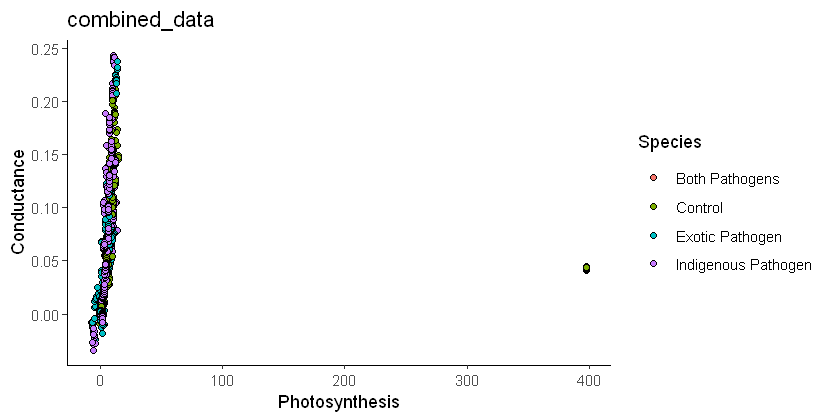

In [47]:
# Make plot of all data
ggplot(data=combined_data,
        aes(x=Photosynthesis, y=Conductance, fill=Species))+
        geom_point(shape=21)+
        theme_classic()+
        labs(title="combined_data")

Then,

<br>
<div class="use_editor"></div>

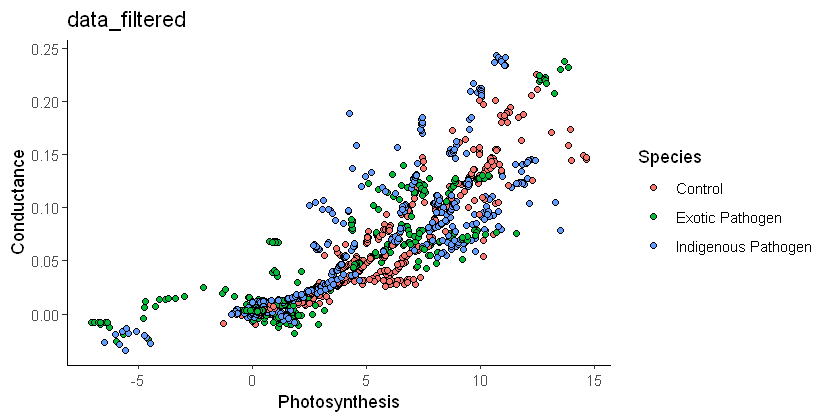

In [48]:
# Make plot on FILTERED data (without outliers)
ggplot(data=data_filtered,
        aes(x=Photosynthesis, y=Conductance, fill=Species))+
        geom_point(shape=21)+
        theme_classic()+
        labs(title="data_filtered")

 In `data_filtered`, outlying data points (Photosynthesis>200) have been filtered out making it easier to visualize our data.

<div class="Q"><br><br>

What does `!=` in the `select()` funtion mean?
    
ANSWER to be removed in final iteration: Not equal to <br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many levels does Species have in `data_filtered`?
    
ANSWER :4 <br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

TRUE or FALSE: "Both Pathogens" in `data_filtered` has 0 observations because they did not take measurements?
    
ANSWER :FALSE <br><br>

<br><br><div class="qhelp"></div></div>

<br><br><br>
<div class="startTASK"></div>

Create a dataset called `male_fox_data` wherein only data from male foxes are included.

<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

How many rows does `male_fox_data` have?
    
ANSWER to be removed in final iteration: 15 <br><br>

<br><br><div class="qhelp"></div></div>


# Nested functions

What if you want to select and filter at the same time? There are three ways to do this: use intermediate steps, nested functions, or pipes.

What if we wanted to select only Sample type, Photosynthesis and Conductance from the Control and Indigenous Pathogen Species? We could create multiple objects.

We can use `%in%` with `select()`to specify a list of paramters/levels we want to keep.

<br>
<div class="use_editor"></div>

In [50]:
# Creates a new data frame with rows containing only data from Indigenous Pathogen and Control Species
species_filtered <- filter(data_filtered, Species %in% c("Indigenous Pathogen", "Control")) 

# Then only selects the columns "Sample type", Species,Photosynthesis, Conductance)  
species_sml <- select(species_filtered, `Sample type`, Species, Photosynthesis, Conductance)

Now, lets take a look at `species_sml`:

<br>
<div class="use_console"></div>


In [51]:
head(species_sml)

Sample type,Species,Photosynthesis,Conductance
1DroughtControl1,Control,0.7101345,0.005128090
1DroughtControl1,Control,3.0909224,0.016987563
1DroughtControl1,Control,2.8754158,0.017134086
1DroughtControl1,Control,2.8534106,0.017291149
1DroughtControl1,Control,2.9267403,0.017253899
1DroughtControl1,Control,1.0517300,0.007082619


Then, 

<br>
<div class="use_console"></div>

In [52]:
str(species_sml)

'data.frame':	1132 obs. of  4 variables:
 $ Sample type   : chr  "1DroughtControl1" "1DroughtControl1" "1DroughtControl1" "1DroughtControl1" ...
 $ Species       : Factor w/ 4 levels "Both Pathogens",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Photosynthesis: num  0.71 3.09 2.88 2.85 2.93 ...
 $ Conductance   : num  0.00513 0.01699 0.01713 0.01729 0.01725 ...


This is readable, but is clunky and can clutter up your workspace with lots of small objects that youd have to keep track of.

Another method would be to **nested functions** (i.e. one function inside of another), like this:

<img src="nested.png" width="700px">

<br>
<div class="use_editor"></div>

In [53]:
# Example of nested functions
species_sml <- select(filter(data_filtered, Species %in% c("Indigenous Pathogen", "Control")),
                      `Sample type`, Species, Photosynthesis, Conductance)

Let's take a look:

<br>
<div class="use_console"></div>

In [54]:
head(species_sml)

Sample type,Species,Photosynthesis,Conductance
1DroughtControl1,Control,0.7101345,0.005128090
1DroughtControl1,Control,3.0909224,0.016987563
1DroughtControl1,Control,2.8754158,0.017134086
1DroughtControl1,Control,2.8534106,0.017291149
1DroughtControl1,Control,2.9267403,0.017253899
1DroughtControl1,Control,1.0517300,0.007082619


Then,

<br>
<div class="use_console"></div>

In [55]:
str(species_sml)

'data.frame':	1132 obs. of  4 variables:
 $ Sample type   : chr  "1DroughtControl1" "1DroughtControl1" "1DroughtControl1" "1DroughtControl1" ...
 $ Species       : Factor w/ 4 levels "Both Pathogens",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Photosynthesis: num  0.71 3.09 2.88 2.85 2.93 ...
 $ Conductance   : num  0.00513 0.01699 0.01713 0.01729 0.01725 ...


R evaluates the expression from the inside out (in this case, filtering, then selecting). **I would avoid this method since it makes debugging your code a nightmare!**

# Pipes

A better method is to use pipes. Pipes let you take the output of one function and send it directly to the next, which is useful when you need to do many things to the same dataset. Pipes in R look like `%>%` and are made available via the `magrittr` package, installed automatically with `dplyr`. 

If you use RStudio, you can type the pipe with `Ctrl + Shift + M` if you have a PC or `Cmd + Shift + M` if you have a Mac.

We will re-create the `species_sml` dataset using pipes. First, we want to filter data from the `data_filtered` dataset, keeping rows where Species is either "Indigenous Pathogen" or "control", then select only the Sample type, Species, Photosynthesis, Conductance columns. We will use the pipe to send the `data_filtered` dataset through the `filter()` then `select()` functions.

<br>
<div class="use_editor"></div>

In [56]:
# Example of Pipes
species_sml<-data_filtered %>%
  filter(Species %in% c("Indigenous Pathogen", "Control")) %>% 
  select(`Sample type`, Species, Photosynthesis, Conductance)  

You can also use pipes to take a look at your data:

<br>
<div class="use_console"></div>

In [57]:
species_sml %>% 
head(4)

Sample type,Species,Photosynthesis,Conductance
1DroughtControl1,Control,0.7101345,0.00512809
1DroughtControl1,Control,3.0909224,0.01698756
1DroughtControl1,Control,2.8754158,0.01713409
1DroughtControl1,Control,2.8534106,0.01729115


However, I find it simpler to use the "normal" approach:

<br>
<div class="use_console"></div>

In [58]:
str(species_sml)

'data.frame':	1132 obs. of  4 variables:
 $ Sample type   : chr  "1DroughtControl1" "1DroughtControl1" "1DroughtControl1" "1DroughtControl1" ...
 $ Species       : Factor w/ 4 levels "Both Pathogens",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Photosynthesis: num  0.71 3.09 2.88 2.85 2.93 ...
 $ Conductance   : num  0.00513 0.01699 0.01713 0.01729 0.01725 ...


Let's make a plot also using **pipes**:

<br>
<div class="use_editor"></div>

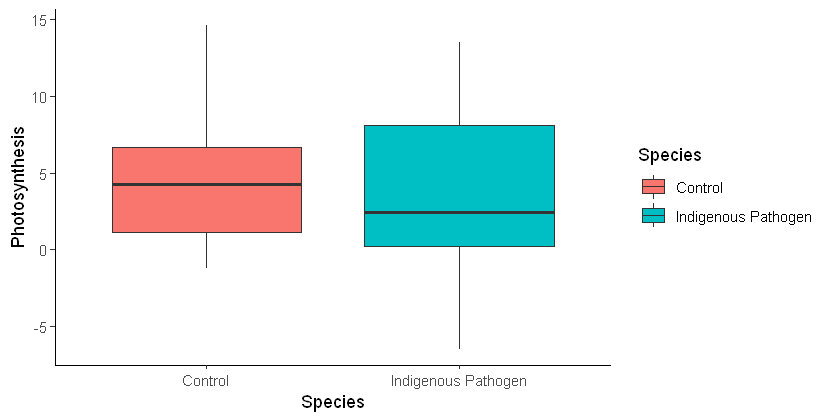

In [59]:
# Example of a plot using pipes
species_sml %>% 
ggplot()+
geom_boxplot(aes(x=Species, y=Photosynthesis, fill=Species))+
theme_classic()

Since `%>%` takes the object on its left and passes it as the first argument to the function on its right, we don't need to explicitly include the data frame as an argument to the `filter()` and `select()` functions any more.

<img src="pipes.png" width="800px">

<br><br><br>
<div class="startTASK"></div>

Using the `fox_data` dataset, create a new object `fox_data_cleaned` that contains only the columns ID, Sex, avfood, from female foxes only.
<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

How many rows are there in `fox_data_cleaned`?
    
ANSWER to be removed in final iteration: 15 <br><br>
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the median weight of female foxes in the `fox_data_cleaned` dataset?
    
ANSWER:4.399 <br><br>
    
<br><br><div class="qhelp"></div></div>

_________________________________________________________________________

# Reshaping your dataframe with **pivot_longer** and **pivot_wider()**

Useful links:

1. [Pivot tutorial](https://tidyr.tidyverse.org/articles/pivot.html)
1. [pivot_longer](https://rdrr.io/github/tidyverse/tidyr/man/pivot_longer.html)
1. [pivot_wider](https://tidyr.tidyverse.org/reference/pivot_wider.html)

Sometimes you may need to alter the layout of tabluar datasets while preserving the values and relationships contained within. This can also be very useful when plotting data from very large datasets with multiple columns. You may have heard of `spread()` and `gather()`. These are functions with similar but more limited functionality and were replaced by `pivot_wider()` and `pivot_longer()`.

## pivot_wider

**pivot_wider** moves rows into columns (long to wide format). Values in the "Parameter" column become new column names and their respective values get copied into the reshaped data. Columns with no observations will get coded with a value of NA.

<img src="pivot_wider.png" width="700px">

Let's use `pivot_wider()` to turn Species factors into column names by changing the dataset from long to wide format.

<br>
<div class="use_editor"></div>

In [60]:
# Example of pivot_wide
data_wide<-data_filtered  %>% 
    filter(Treatment=="Drought", Obs==1) %>% 
    select(Species, `Sample type`, Date, Photosynthesis) %>% 
    pivot_wider(names_from="Species", values_from="Photosynthesis") 

Lets take a look at `data_wide`:

<br>
<div class="use_console"></div>

In [61]:
data_wide %>% 
head(4)

Sample type,Date,Control,Exotic Pathogen,Indigenous Pathogen
1DroughtControl1,6/21/2018,0.7101345,NA,NA
1DroughtControl1,6/8/2018,1.5643579,NA,NA
1DroughtControl10,6/12/2018,0.3439647,NA,NA
1DroughtControl10,7/4/2018,0.4086491,NA,NA


In [62]:
str(data_wide)

tibble [73 x 5] (S3: tbl_df/tbl/data.frame)
 $ Sample type        : chr [1:73] "1DroughtControl1" "1DroughtControl1" "1DroughtControl10" "1DroughtControl10" ...
 $ Date               : chr [1:73] "6/21/2018" "6/8/2018" "6/12/2018" "7/4/2018" ...
 $ Control            : num [1:73] 0.7101 1.5644 0.344 0.4086 0.0945 ...
 $ Exotic Pathogen    : num [1:73] NA NA NA NA NA NA NA NA NA NA ...
 $ Indigenous Pathogen: num [1:73] NA NA NA NA NA NA NA NA NA NA ...


Notice that some columns have NA values. `pivot_wider` creates that value if it doesn't exist in the data.

Let's try to plot the data from the Control, Exotic Pathogen, and Indigenous Pathogen columns by date. In the wide format we will have to create 3 separate plots and used a plotting package like `cowplot` to acheive what we want. Wide format is nice for people that are not used to seeing data separated into value (i.e. mg/L O2) and classifier/parameter (i.e. ogygen) columns (like what you'll see in a little bit).

In [63]:
control<-data_wide %>% 
ggplot()+
geom_boxplot(aes(x=Date, y= Control))+
theme_classic()+
theme(axis.text.x=element_text(angle=90)) #roates X-axis text to 90 degrees

exotic<-data_wide %>% 
ggplot()+
geom_boxplot(aes(x=Date, y= `Exotic Pathogen`))+
theme_classic()+
theme(axis.text.x=element_text(angle=90))

indigenous<-data_wide %>% 
ggplot()+
geom_boxplot(aes(x=Date, y= `Indigenous Pathogen`))+
theme_classic()+
theme(axis.text.x=element_text(angle=90))

cowplot::plot_grid(control, exotic,indigenous, nrow=1)

ERROR: Error in loadNamespace(name): there is no package called 'cowplot'


<div class="Q"><br><br>

How many observations does `data_wide` have?
    
ANSWER:73 <br><br>

<br><br><div class="qhelp"></div></div>

## pivot_longer

In this situation we are gathering the column names and turning them into a pair of new variables. One variable represents the column names as values, and the other variable contains the values previously associated with the column names.

**pivot_longer** moves columns into rows (wide to long format). `pivot_longer` takes several arguements but the most important ones for this exercise are `names_to` and `values_to`. `names_to` creates a new classifier/criteria column, taking arguements from your column names. `values_to` takes values from those columns and creates a new column of values classfied by the factors created by `names_to`.

<img src="pivot_longer.png" width="700px">

Let's use `pivot_longer` to transform `data_wide` back into `data_filtered`.

In [64]:
data_long<-data_wide %>%
pivot_longer(names_to="Species", values_to="Photosynthesis", values_drop_na = TRUE, !`Sample type`:Date) 

data_long%>% 
head(4)

Sample type,Date,Species,Photosynthesis
1DroughtControl1,6/21/2018,Control,0.7101345
1DroughtControl1,6/8/2018,Control,1.5643579
1DroughtControl10,6/12/2018,Control,0.3439647
1DroughtControl10,7/4/2018,Control,0.4086491


In [65]:
str(data_long)

tibble [73 x 4] (S3: tbl_df/tbl/data.frame)
 $ Sample type   : chr [1:73] "1DroughtControl1" "1DroughtControl1" "1DroughtControl10" "1DroughtControl10" ...
 $ Date          : chr [1:73] "6/21/2018" "6/8/2018" "6/12/2018" "7/4/2018" ...
 $ Species       : chr [1:73] "Control" "Control" "Control" "Control" ...
 $ Photosynthesis: num [1:73] 0.7101 1.5644 0.344 0.4086 0.0945 ...


We have bassically created a column for values called Photosynthesis and a classifier/parameter column called Species. Let's try and plot Photosynthesis for all three species by date again.

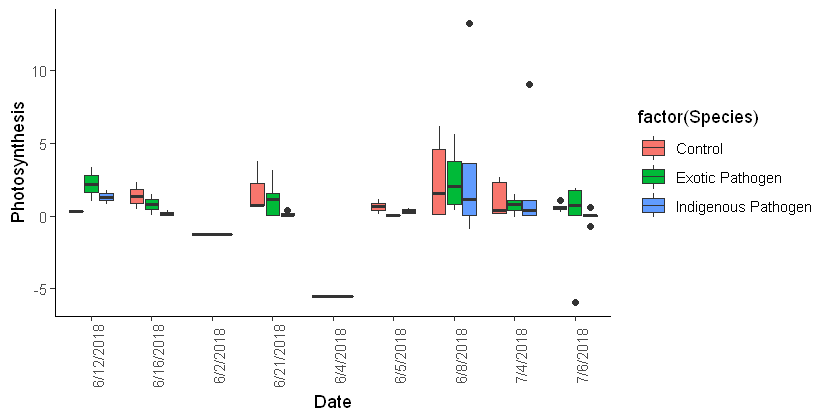

In [66]:
ggplot(data_long,
       aes(x=Date, y=Photosynthesis, fill=factor(Species)))+
       geom_boxplot()+
theme_classic()+
theme(axis.text.x=element_text(angle=90))

We got a similar graphical result with less lines of code! Long format is great when you need to plot data with multiple factor levels. 

<div class="Q"><br><br>

How many rows does `data_long` have?
    
ANSWER:73 <br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

TRUE or FALSE: `data_wide` and `data_long` have the same number ofnobservations because `pivot_wider` fills missing observations with NA?
    
ANSWER:TRUE <br><br>

<br><br><div class="qhelp"></div></div>

_______________________________________________________________________________________________

# Mutate

We can use `mutate()` to create new columns based on the values in existing columns, for example to do unit conversions, or to find the ratio of values in two columns.

For example, we can convert Photosynthesis oxygen measurements from mg/L to ug/L by creating a new column called `Photosynthesis_ppb`

<img src="mutate.png" width="700px">

<br>
<br>
<div class="use_editor"></div>

In [67]:
# Example of mutate
unit_conversion <- data_filtered %>%
    mutate(Photosynthesis_ppb = Photosynthesis*1000) %>% 
    select(`Sample type`, Photosynthesis, Photosynthesis_ppb) 

Let's take a look at `unit_conversion`:

<br>
<div class="use_console"></div>

In [68]:
unit_conversion%>% 
head(4)

Sample type,Photosynthesis,Photosynthesis_ppb
1DroughtControl1,0.7101345,710.1345
1DroughtControl1,3.0909224,3090.9224
1DroughtControl1,2.8754158,2875.4158
1DroughtControl1,2.8534106,2853.4106


Then,

<br>
<div class="use_console"></div>

In [69]:
str(unit_conversion)

'data.frame':	1640 obs. of  3 variables:
 $ Sample type       : chr  "1DroughtControl1" "1DroughtControl1" "1DroughtControl1" "1DroughtControl1" ...
 $ Photosynthesis    : num  0.71 3.09 2.88 2.85 2.93 ...
 $ Photosynthesis_ppb: num  710 3091 2875 2853 2927 ...


Let's make a plot:

<br>
<div class="use_editor"></div>

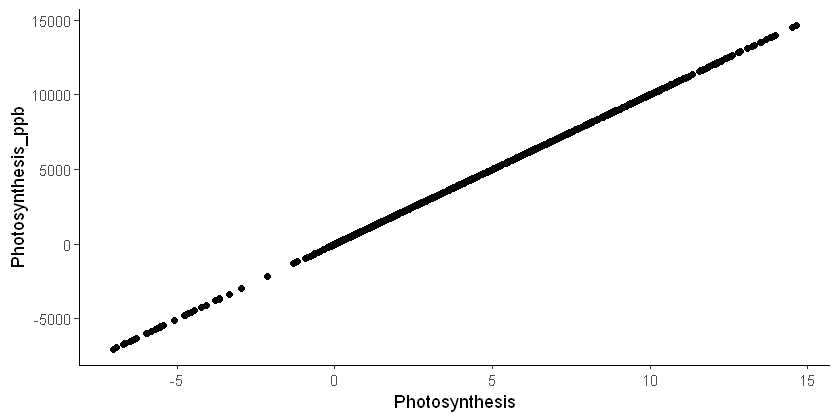

In [70]:
# PLot of unit_conversion
unit_conversion %>% 
    ggplot(aes(x=Photosynthesis, y=Photosynthesis_ppb))+
    geom_point()+
    theme_classic()

Let's see some summary statistics:

<br>
<div class="use_console"></div>

In [71]:
summary(unit_conversion)

 Sample type        Photosynthesis    Photosynthesis_ppb
 Length:1640        Min.   :-7.0274   Min.   :-7027.4   
 Class :character   1st Qu.: 0.4305   1st Qu.:  430.5   
 Mode  :character   Median : 2.5453   Median : 2545.3   
                    Mean   : 3.7214   Mean   : 3721.4   
                    3rd Qu.: 6.7877   3rd Qu.: 6787.7   
                    Max.   :14.6453   Max.   :14645.3   

Notice that summary statistics after the mutation are 1000 times the original.

We can also use mutate to change variable level names.

<br>
<div class="use_editor"></div>

In [72]:
# Change variable names
change_lables <- data_filtered %>%
mutate(Species=factor(Species,
                     levels=c("Control", "Exotic Pathogen","Indigenous Pathogen"),
                     labels =c("Control", "P.Cinnamomi", "P.Multivora")))

Let's check levels:

<br>
<div class="use_console"></div>

In [73]:
levels(change_lables$Species)

[1] "Control"     "P.Cinnamomi" "P.Multivora"

We can also use `mutate()` to change variable types. Here, we will convert some variables from character to factors:

<br>
<div class="use_editor"></div>

In [74]:
# Example of use of mutate to change variable types
data_filtered <- data_filtered %>% 
mutate(`Sample type`= factor(`Sample type`),
      Trial = factor(Trial),
      Treatment = factor(Treatment),
      Species = factor(Species),
      `Days after inoculation`=factor(`Days after inoculation`))

We can use the function `sapply()` to see the column variable classes:

<br>
<div class="use_console"></div>

In [75]:
sapply(data_filtered,class)

Sample type Days after inoculation                   Date 
              "factor"               "factor"            "character" 
                 Licor                  Trial              Treatment 
             "numeric"               "factor"               "factor" 
               Species           Plant Number         Isolate Number 
              "factor"              "numeric"              "numeric" 
  Unique Sample Number                    Obs         Photosynthesis 
             "numeric"              "numeric"              "numeric" 
           Conductance                     Ci 
             "numeric"              "numeric"

<br><br><br>
<div class="startTASK"></div>

In fox_data, create a new column called 'Consumption' which will contain values of avfood divided by weight
i.e Consumption =avfood/weight

<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

What is the mean Consumption?
    
ANSWER:0.1544922 
    
<br><br><div class="qhelp"></div></div>

_______________________________________________________________________________________________

# group_by() and summarize() functions

Many data analysis tasks can be approached using the split-apply-combine paradigm: 

1. split the data into groups 
1. apply some analysis to each group
1. combine the results. 

dplyr makes this very easy through the use of the `group_by()` function. `group_by()` is often used together with `summarize()`, which collapses each group into a single-row summary of that group. `group_by()` takes as arguments the column names that contain the categorical variables for which you want to calculate the summary statistics. 

<img src="groupbysummarize.png" width="800px">

In the example below, we compute the mean and standard deviation of Photosynthesis measurements by Treatment.

<br>
<div class="use_editor"></div>

In [76]:
# Compute the mean and standard deviation of Photosynthesis measurements by Treatment
data_filtered %>% 
group_by(Treatment) %>% 
summarize(average=mean(Photosynthesis),
        dev=sd(Photosynthesis))

Treatment,average,dev
Drought,1.232575,2.488081
Wet,5.918684,3.682469


<div class="Q"><br><br>

What would the code inside the summarise function look like if we wanted to get the mean of Conductance?
    
ANSWER to be removed in final iteration: summarize(average=mean(Conductance)) <br><br>
    
<br><br><div class="qhelp"></div></div>

Let's take a look at our data graphically. We notice that the solid horizontal lines representing our average Wet and Drought values don't line up with the boxplot median. This indicates that our data might not be normally distributed. We may want to use the `median()` function to find the midpoint of the data instead.

<br>
<div class="use_editor"></div>

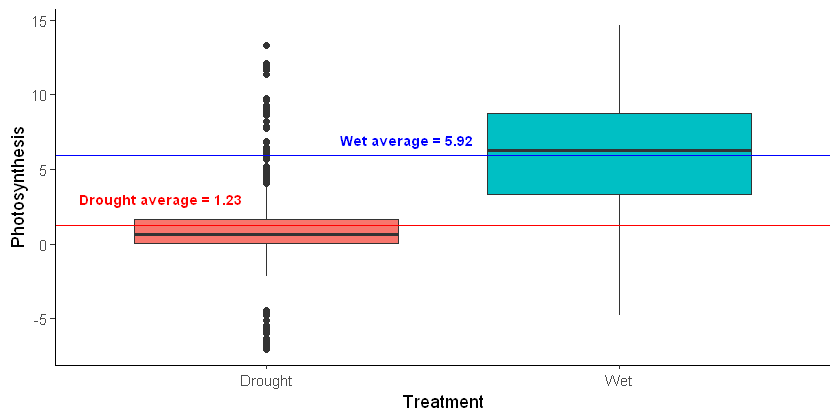

In [77]:
data_filtered %>% 
group_by(Treatment) %>% 
ggplot()+
geom_boxplot(aes(x=Treatment, y=Photosynthesis, fill=Treatment))+
geom_hline(aes(yintercept=1.232575), color="red")+
annotate("text", x =0.7, y = 3,label ="Drought average = 1.23", size = 3,fontface =2, color="red")+
geom_hline(aes(yintercept=5.918684), color="blue")+
annotate("text", x =1.4, y = 7,label ="Wet average = 5.92", size = 3,fontface =2, color="blue")+
theme_classic()+
guides(fill=FALSE)

We can also group by mutliple columns.

<br>
<div class="use_editor"></div>

In [78]:
data_filtered %>% 
group_by(Treatment, Species) %>% 
summarize(median=median(Photosynthesis))

`summarise()` has grouped output by 'Treatment'. You can override using the `.groups` argument.


Treatment,Species,median
Drought,Control,1.0502198
Drought,Exotic Pathogen,1.0440030
Drought,Indigenous Pathogen,0.3459798
Wet,Control,6.2841864
Wet,Exotic Pathogen,4.7105453
Wet,Indigenous Pathogen,7.2282008


<br>
<div class="use_editor"></div>

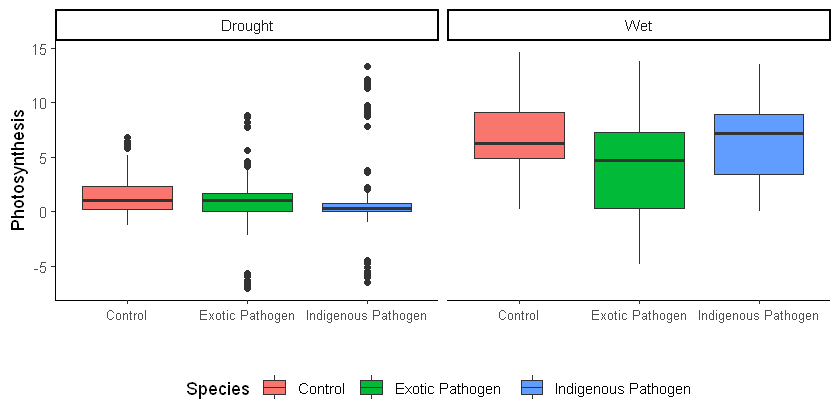

In [79]:
data_filtered %>% 
group_by(Treatment, Species) %>%  
ggplot(aes(x=Species, y=Photosynthesis))+
geom_boxplot(aes(fill=Species))+
labs(x="")+
theme_classic()+
theme(axis.text.x=element_text(size=8),
     legend.position="bottom")+ 
facet_wrap(~Treatment) # separates plots by Treatment

<div class="Q"><br><br>

What would the code inside the group_by function look like if we wanted to group by both Date, Treatment and Species?
    
ANSWER to be removed in final iteration: group_by(Date, Treatment, Species) <br><br>
    
<br><br><div class="qhelp"></div></div>

We can also arrange the values in order of mean_ppb using the `arrange()` function. To sort in descending order, we need to add the `desc()` function.

<br>
<div class="use_editor"></div>

In [80]:
data_filtered %>% 
group_by(Treatment, Species) %>% 
summarize(median=median(Photosynthesis)) %>%
  arrange(desc(median))

`summarise()` has grouped output by 'Treatment'. You can override using the `.groups` argument.


Treatment,Species,median
Wet,Indigenous Pathogen,7.2282008
Wet,Control,6.2841864
Wet,Exotic Pathogen,4.7105453
Drought,Control,1.0502198
Drought,Exotic Pathogen,1.0440030
Drought,Indigenous Pathogen,0.3459798


Here is a table of some useful functions you can use with `summarize`. 

<img src="datasummaryfunction.png" width="500px">


<div class="Q"><br><br>

Using the help section, what would your arrange function code look like to arrange median in ascending order?
    
ANSWER to be removed in final iteration: arrange(median) <br><br>

multiple choice options: arrange(asc(median))

arrange(sort(median))

arrange(order(median))
    
<br><br><div class="qhelp"></div></div>

<br><br><br>
<div class="startTASK"></div>

In `fox_data`, find the mean weight by sex of the fox population.


<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

What is the mean weight of Male foxes?
    
ANSWER to be removed in final iteration: <br><br>


<br><br><div class="qhelp"></div></div>

_______________________________________________________________________________________________

# Counting observations

When working with data, we often want to know the number of observations found for each factor or combination of factors. For this task, `dplyr` provides `count()`. Let's summarise the number of measurements made for each plant on each day.

<br>
<div class="use_editor"></div>

In [81]:
data_filtered %>%
    count(`Sample type`, `Days after inoculation`) %>% 
head(4)

Sample type,Days after inoculation,n
1DroughtControl1,9,10
1DroughtControl1,22,13
1DroughtControl10,13,10
1DroughtControl10,35,10


We can also use `summarise()`,`n()` with `group_by()` to attain similar results.

<br>
<div class="use_editor"></div>

In [82]:
data_filtered %>%
    group_by(`Sample type`, `Days after inoculation`) %>%
    summarise(count = n())  %>% 
head(4)

`summarise()` has grouped output by 'Sample type'. You can override using the `.groups` argument.


Sample type,Days after inoculation,count
1DroughtControl1,9,10
1DroughtControl1,22,13
1DroughtControl10,13,10
1DroughtControl10,35,10


There should be at least 10 measurements per plant per day (count >= 10). Say we wanted to see how many plants were there per Treatment and Species, we could use the function `n_distinct()` to count unique instances and remove duplicates. 

<br>
<div class="use_editor"></div>

In [83]:
plant.count<- data_filtered %>% 
group_by(Treatment,Species,`Days after inoculation`) %>% 
summarize(count=n_distinct(`Sample type`)) 

plant.count %>% head(4)

`summarise()` has grouped output by 'Treatment', 'Species'. You can override using the `.groups` argument.


Treatment,Species,Days after inoculation,count
Drought,Control,3,1
Drought,Control,6,2
Drought,Control,9,5
Drought,Control,13,1


We can proceed with `arrange()` to sort the table according to a number of criteria so that we have a better comparison. For instance, we might want to arrange the table above in:

1. by Treatment and,
1. in descending order of the count:

<br>
<div class="use_editor"></div>

In [84]:
plant.count %>%
  arrange(Treatment, desc(count)) %>% 
head(10)

Treatment,Species,Days after inoculation,count
Drought,Exotic Pathogen,37,6
Drought,Control,9,5
Drought,Control,35,5
Drought,Exotic Pathogen,22,5
Drought,Indigenous Pathogen,9,5
Drought,Indigenous Pathogen,35,5
Drought,Indigenous Pathogen,37,5
Drought,Control,37,4
Drought,Exotic Pathogen,9,4
Drought,Exotic Pathogen,35,4


Let's see how may samples were taken for each species and treatment for each value of `Days after inoculation`. 

<br>
<div class="use_editor"></div>

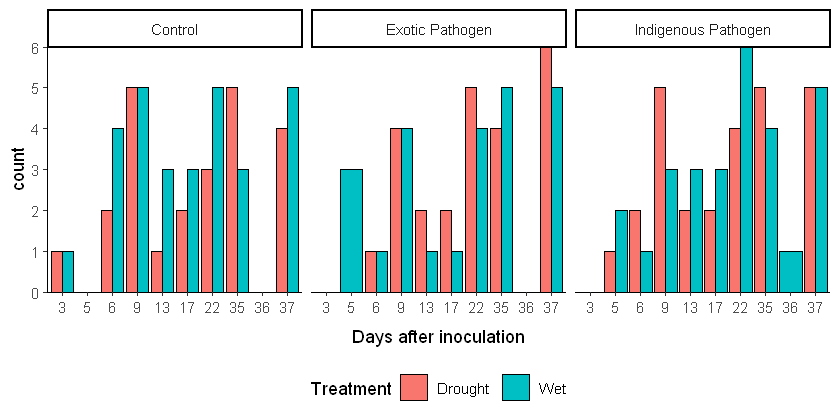

In [85]:
plant.count %>% 
ggplot(aes(x=`Days after inoculation`, y=count, fill =Treatment))+
geom_col(position="dodge", color="black")+
theme_classic()+
facet_wrap(~Species)+
scale_y_continuous(expand=c(0,0))+ # removes space between plot and axis
theme(legend.position="bottom")

<div class="Q"><br><br>

What is the difference between the functions n() and n_distinct()?
    
ANSWER to be removed in final iteration: n() counts all observations. n_distinct() counts unique observations and excludes duplicates <br><br>
    
<br><br><div class="qhelp"></div></div>

# Preliminary data examination

Now that we've got the basics down, let's play around with our data. 

## Mean per plant

Let's take a look at the mean photosynthesis value per plant while keeping our other variables of interest. Here we are calculating a plant average for each plant. Note that we did not use the same plants every time we took measurements (1DroughtControl1 was only measured on days 9 and 22). We could only measure <30 plants per day, so we randomly selected them from the treatments each time we went to measure.

<br>
<div class="use_editor"></div>

In [86]:
Plant.Mean.Photo <- data_filtered %>% 
group_by(`Sample type`,Trial,Treatment,Species,`Days after inoculation`) %>% 
summarize(photo_average=mean(Photosynthesis,na.rm=TRUE))

Plant.Mean.Photo  %>% 
head(4)

`summarise()` has grouped output by 'Sample type', 'Trial', 'Treatment', 'Species'. You can override using the `.groups` argument.


Sample type,Trial,Treatment,Species,Days after inoculation,photo_average
1DroughtControl1,1,Drought,Control,9,1.6631289
1DroughtControl1,1,Drought,Control,22,2.1347472
1DroughtControl10,1,Drought,Control,13,0.4922988
1DroughtControl10,1,Drought,Control,35,0.5280732


<br>
<div class="use_editor"></div>

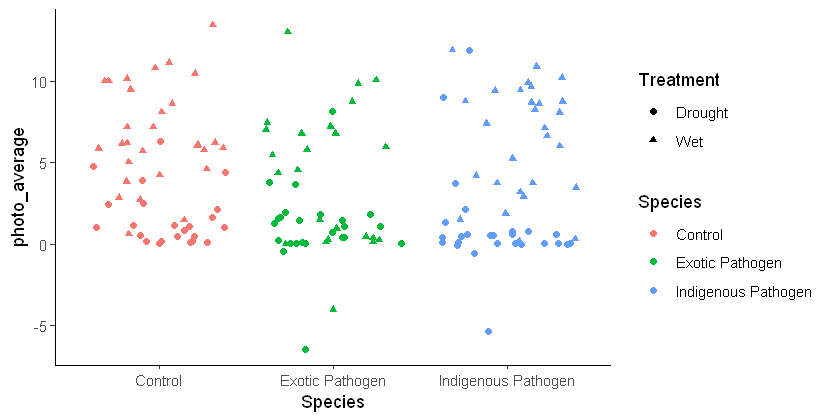

In [87]:
Plant.Mean.Photo %>% 
ggplot(aes(Species,photo_average,shape=Treatment,color=Species))+
geom_point(position="jitter")+
theme_classic()

Each plant is a sampling unit, so we want to conduct our analysis with a single value for each plant. If we include each measurement as a seperate observation, we are incorporating pseudoreplication because each measurement was not independant (10 measurements were made on a single plant–therefore, each measurement is dependant on the plant).

## Mean per group

Ok now that we have the means per plant, we can look at the means per trial, treatment, etc.

<br>
<div class="use_editor"></div>

In [88]:
Group.Mean.Photo<-Plant.Mean.Photo %>% 
group_by(Treatment,Species,`Days after inoculation`) %>% 
summarize(count=n(), 
          ave=mean(photo_average),
          dev=sd(photo_average), #standard deviation
          se=dev/sqrt(count) #standard error
         )

Group.Mean.Photo  %>% 
head(4)

`summarise()` has grouped output by 'Treatment', 'Species'. You can override using the `.groups` argument.


Treatment,Species,Days after inoculation,count,ave,dev,se
Drought,Control,3,1,1.1315650,NA,NA
Drought,Control,6,2,0.6558923,0.6616764,0.4678758
Drought,Control,9,5,2.5938583,2.8121587,1.2576356
Drought,Control,13,1,0.4922988,NA,NA


<span class="note"></span> If there was only one plant in a group, the standard deviation, `dev` could not be calculated because there is no variation Some of the data might be missing and we would need to address this in real analysis.

We can plot the mean values from each Species and each Treatment on each day they were measured.

<br>
<div class="use_editor"></div>

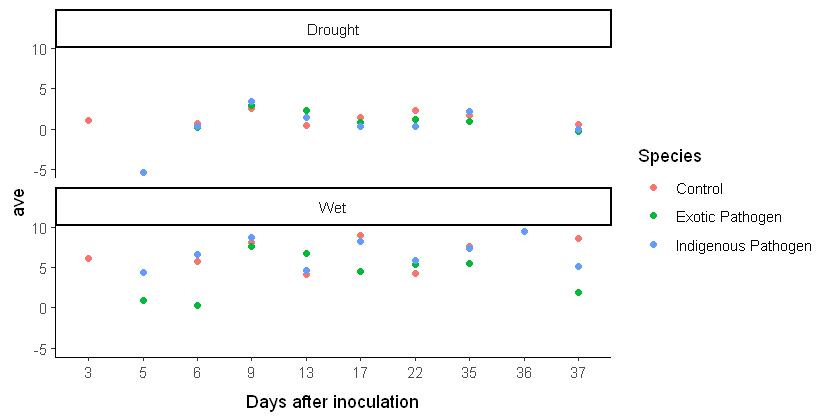

In [89]:
ggplot(Group.Mean.Photo,aes(x=`Days after inoculation`,y=ave,color=Species))+
geom_point()+
facet_wrap(~Treatment,ncol=1) +
theme_classic()

This plot reveals some concerns: only control plants were measured on day 3 and no control plants were measured on day 5. Only one group of plants measured on day 36. Lots of errors in data, demonstrating the importance of exploring your data graphically!

Let's see if we can add estimates of error to our measurments.

<br>
<div class="use_editor"></div>

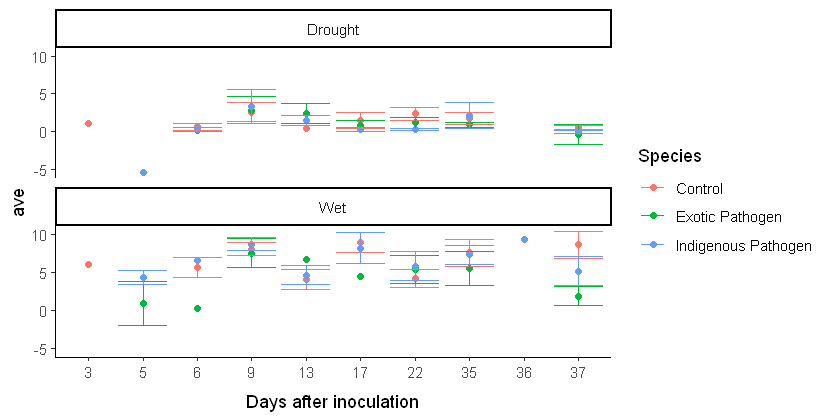

In [90]:
ggplot(Group.Mean.Photo,aes(x=`Days after inoculation`,y=ave,color=Species))+
geom_point()+
geom_errorbar(aes(ymin=ave-se, ymax=ave+se))+
facet_wrap(~Treatment,ncol=1) +
theme_classic()

_________________________________________________________________________

# Exporting data

Now that you have learned how to use dplyr to extract information from or summarize your raw data, you may want to export these new data sets to share them with your collaborators or for archival.

Similar to the `read_csv()` function used for reading CSV files into R, there is a `write_csv()` function that generates CSV files from data frames.

Before using `write_csv()`, we are going to create a new folder, data, in our working directory that will store this generated dataset. We don't want to write generated datasets in the same directory as our raw data. It's good practice to keep them separate. The folder for raw data should only contain the raw, unaltered data, and should be left alone to make sure we don't delete or modify it. In contrast, our script will generate the contents of the data directory, so even if the files it contains are deleted, we can always re-generate them.

Let's create a new folder/directory called `data_cleaned` using the `dir.create` function.

In [91]:
dir.create(file.path("data_cleaned"))

Warning message in dir.create(file.path("data_cleaned")):
"'data_cleaned' already exists"

Now that our data set and data_cleaned folder is ready, we can save it as a CSV file in our data folder.

In [92]:
write_csv(combined_data,"./data_cleaned/combined_data.csv")

<div class="big_title">This is the end of lab</div>

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [2]:
cssFile <- '../css/custom.css'
IRdisplay::display_html(readChar(cssFile, file.info(cssFile)$size))

IRdisplay::display_html("<style>.Q::before {counter-increment: question_num;
    content: 'QUESTION ' counter(question_num) ': '; white-space: pre; }.T::before {counter-increment: task_num;
    content: 'Task ' counter(task_num) ': ';</style>")